# **Energy Insights: Understanding Electricity Consumption through Data Analysis**


Delves into how data analysis can illuminate patterns in electricity usage, revealing the impact of factors like weather, time of day, and household characteristics.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/content/sample_data/ada_dataset.csv'
df = pd.read_csv(file_path)


df.head()


,date,consumer_id,Electricity_Consumption,Temperature,Humidity,Weather_Condition,Day_of_Week,Time_of_Day,Season,Holiday,...,Income_Level,Dwelling_Type,Heating_Type,Cooling_Type,Appliance_Usage,Energy_Efficiency_Rating,Smart_Meter,Previous_Day_Consumption,Previous_Week_Consumption,Previous_Month_Consumption
0,16/02/2023,1101,35.678,12.0,80,cloudy,Thursday,afternoon,winter,0,...,medium,house,gas,fans,medium,70.0,1,30.123,250.567,1000.987
1,17/02/2023,1102,42.109,8.0,90,rainy,Friday,evening,winter,0,...,high,apartment,electric,air conditioning,high,85.0,0,35.678,200.123,800.567
2,18/02/2023,1103,28.901,15.0,70,sunny,Saturday,morning,winter,0,...,low,house,none,fans,low,60.0,1,42.109,300.987,1200.123
3,19/02/2023,1104,40.567,10.0,85,cloudy,Sunday,afternoon,winter,0,...,medium,apartment,gas,air conditioning,medium,75.0,0,28.901,350.123,1500.567
4,20/02/2023,1105,38.901,12.0,80,rainy,Monday,evening,winter,0,...,high,house,electric,fans,high,90.0,1,40.567,400.987,1800.123


In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = '/content/sample_data/ada_dataset.csv'
df = pd.read_csv(file_path)


dimensions = df.shape


print("Number of rows:", dimensions[0])
print("Number of columns:", dimensions[1])


Number of rows: 562
Number of columns: 21


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        562 non-null    object 
 1   consumer_id                 562 non-null    int64  
 2   Electricity_Consumption     562 non-null    float64
 3   Temperature                 562 non-null    float64
 4   Humidity                    562 non-null    int64  
 5   Weather_Condition           562 non-null    object 
 6   Day_of_Week                 562 non-null    object 
 7   Time_of_Day                 562 non-null    object 
 8   Season                      562 non-null    object 
 9   Holiday                     562 non-null    int64  
 10  Household_Size              562 non-null    int64  
 11  Income_Level                562 non-null    object 
 12  Dwelling_Type               562 non-null    object 
 13  Heating_Type                518 non

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np


df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


df.drop(columns=['date'], inplace=True)


df.rename(columns={'Electricity_Consumption': 'Target_Electricity_Consumption'}, inplace=True)
df.head()

,consumer_id,Target_Electricity_Consumption,Temperature,Humidity,Weather_Condition,Day_of_Week,Time_of_Day,Season,Holiday,Household_Size,...,Cooling_Type,Appliance_Usage,Energy_Efficiency_Rating,Smart_Meter,Previous_Day_Consumption,Previous_Week_Consumption,Previous_Month_Consumption,day,month,year
0,1101,35.678,12.0,80,cloudy,Thursday,afternoon,winter,0,3,...,fans,medium,70.0,1,30.123,250.567,1000.987,16,2,2023
1,1102,42.109,8.0,90,rainy,Friday,evening,winter,0,2,...,air conditioning,high,85.0,0,35.678,200.123,800.567,17,2,2023
2,1103,28.901,15.0,70,sunny,Saturday,morning,winter,0,4,...,fans,low,60.0,1,42.109,300.987,1200.123,18,2,2023
3,1104,40.567,10.0,85,cloudy,Sunday,afternoon,winter,0,5,...,air conditioning,medium,75.0,0,28.901,350.123,1500.567,19,2,2023
4,1105,38.901,12.0,80,rainy,Monday,evening,winter,0,3,...,fans,high,90.0,1,40.567,400.987,1800.123,20,2,2023


In [ ]:

desc_stats = df.describe()
print(desc_stats)


missing_values = df.isnull().sum()
print(missing_values)



       consumer_id  Target_Electricity_Consumption  Temperature    Humidity  \
count   562.000000                      562.000000   562.000000  562.000000   
mean   1438.581851                      671.672769    36.313879  106.640569   
std     213.957543                     1216.322210    47.355813  110.166617   
min    1101.000000                       11.900000     8.000000   45.000000   
25%    1257.250000                       56.893500    15.000000   55.000000   
50%    1381.500000                      150.300000    20.000000   65.000000   
75%    1621.750000                      621.815000    24.000000   80.000000   
max    1800.000000                     5720.000000   222.000000  550.000000   

          Holiday  Household_Size  Energy_Efficiency_Rating  Smart_Meter  \
count  562.000000      562.000000                562.000000   562.000000   
mean     0.007117        4.610320                 58.520819     0.524911   
std      0.084139        4.211786                 55.249546 

In [ ]:

df_cleaned = df.dropna()
df_cleaned.isnull().sum()


,0
consumer_id,0
Target_Electricity_Consumption,0
Temperature,0
Humidity,0
Weather_Condition,0
Day_of_Week,0
Time_of_Day,0
Season,0
Holiday,0
Household_Size,0


# **Exploratory Data Analysis**

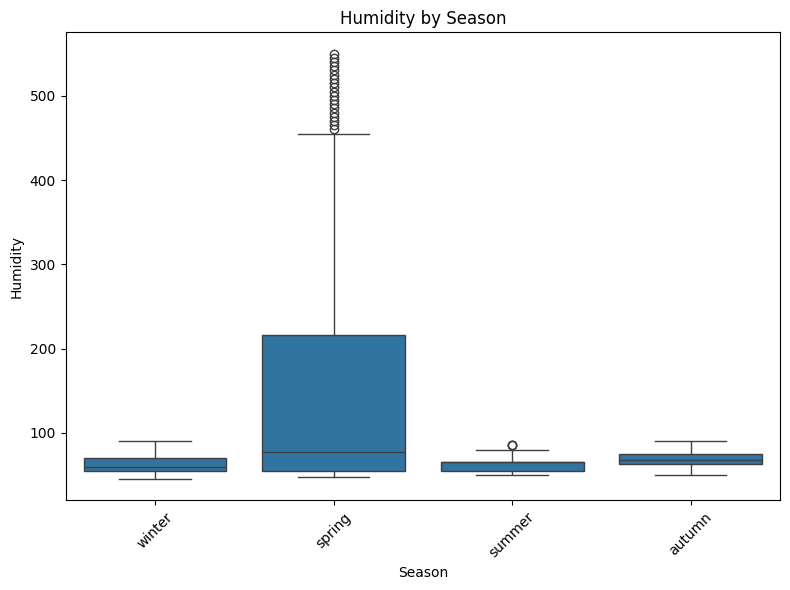

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


num_col = 'Humidity'
cat_col = 'Season'


plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=cat_col, y=num_col)
plt.title(f'{num_col} by {cat_col}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


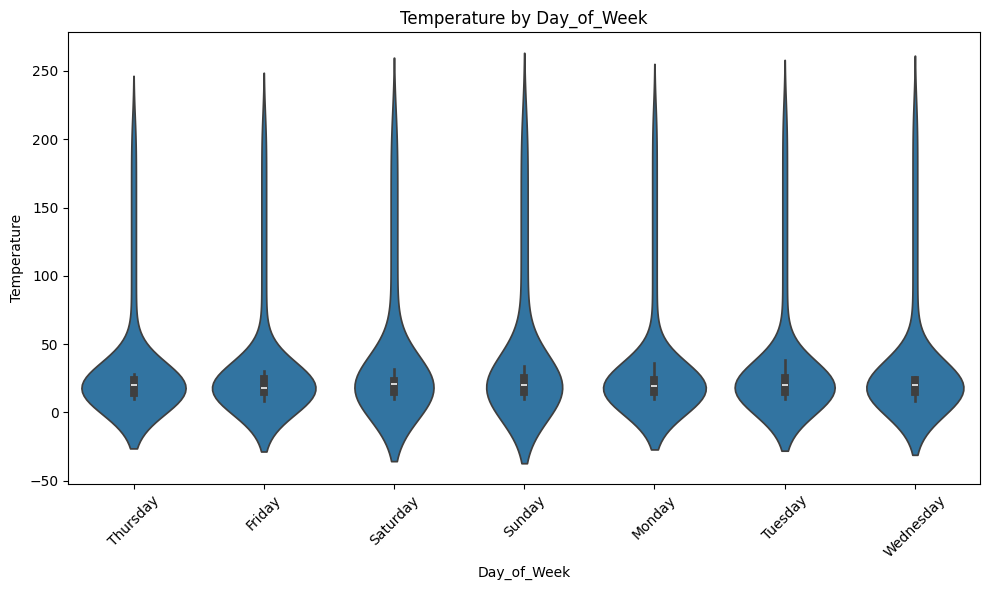

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected columns
num_col = 'Temperature'
cat_col = 'Day_of_Week'

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x=cat_col, y=num_col)
plt.title(f'{num_col} by {cat_col}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-9-3f4a50ac8d0a>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=cat_col, y=num_col, ci=None)


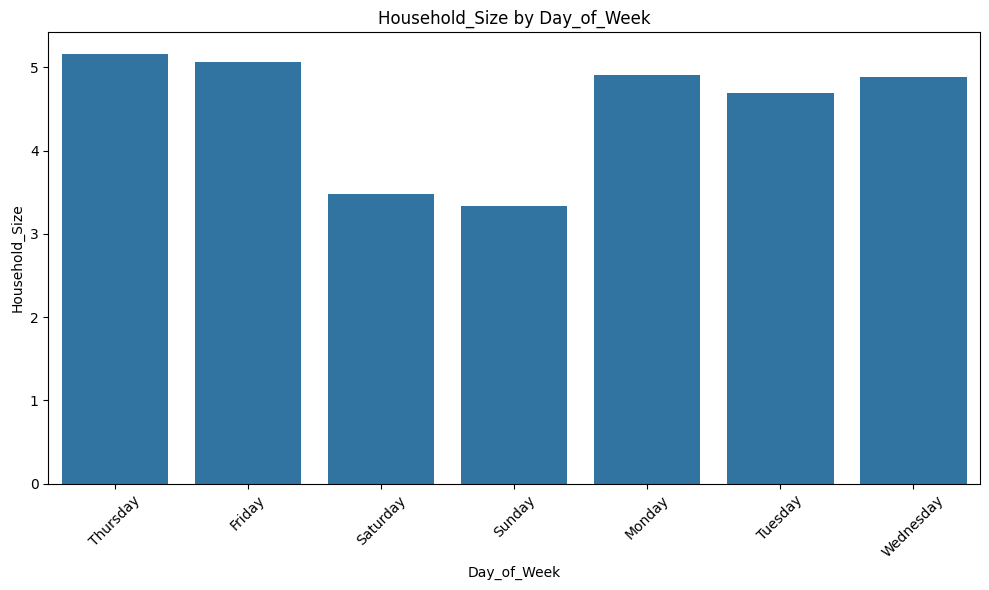

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selected columns
num_col = 'Household_Size'
cat_col = 'Day_of_Week'

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x=cat_col, y=num_col, ci=None)
plt.title(f'{num_col} by {cat_col}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


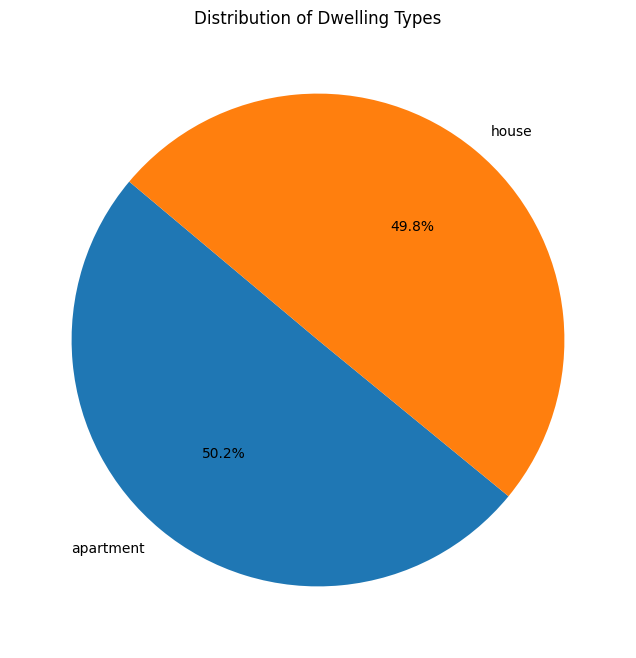

In [ ]:
import matplotlib.pyplot as plt

columns_to_normalize =['Dwelling_Type']

# Convert all categorical columns to lowercase, handling non-string values
for col in columns_to_normalize:
    if df[col].dtype == 'object':  # Check if column is of object (string) type
        df[col] = df[col].str.lower()

# Count the occurrences of each dwelling type
dwelling_counts = df['Dwelling_Type'].value_counts() # Call value_counts() on the DataFrame column

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(dwelling_counts, labels=dwelling_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dwelling Types')
plt.show()

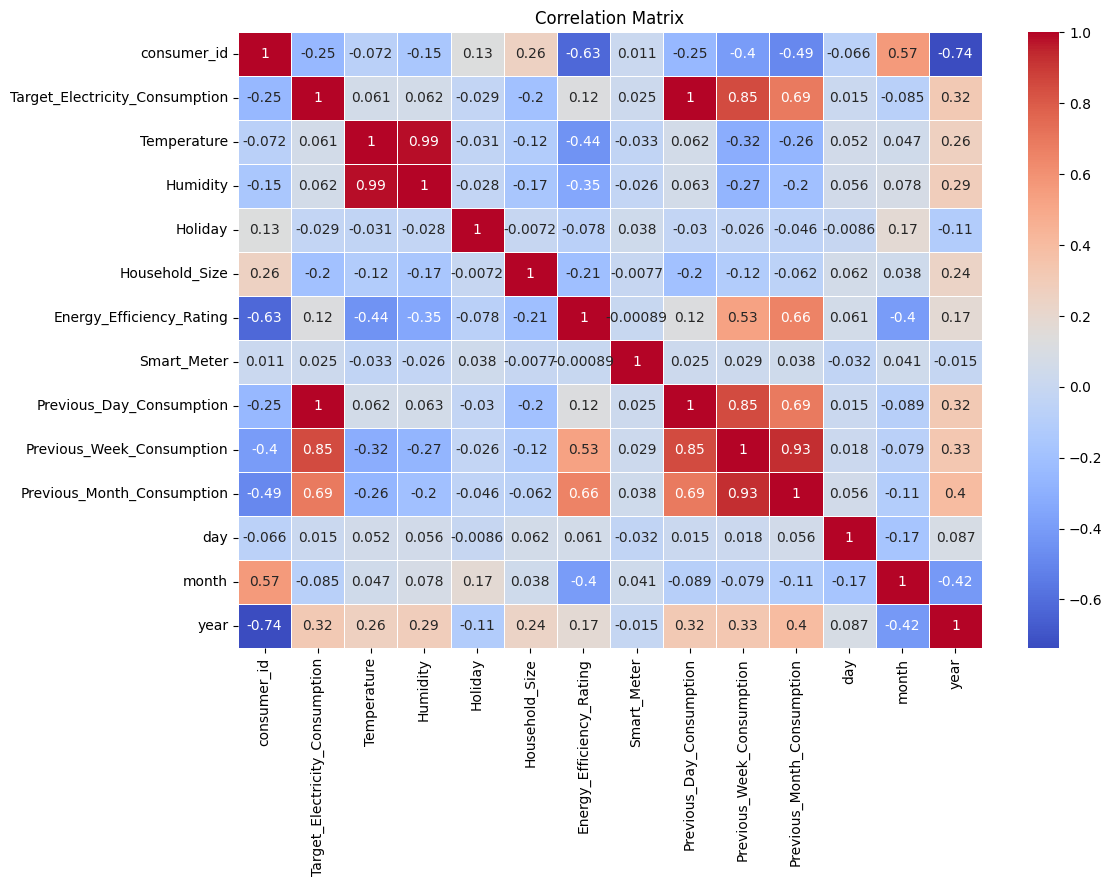

In [ ]:

numerical_df = df.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical_df.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Data Analysis and Modeling**

In [ ]:


categorical_cols = [
    'Weather_Condition', 'Day_of_Week', 'Time_of_Day', 'Season',
    'Income_Level', 'Dwelling_Type', 'Heating_Type', 'Cooling_Type', 'Appliance_Usage'
]
numerical_cols = [
    'Temperature', 'Humidity', 'Holiday',
    'Household_Size', 'Energy_Efficiency_Rating', 'Smart_Meter',
    'Previous_Day_Consumption', 'Previous_Week_Consumption', 'Previous_Month_Consumption',
    'day', 'month', 'year'
]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)


In [ ]:

print(df.columns)


y = df['Target_Electricity_Consumption']

X = df.drop(columns=['Target_Electricity_Consumption'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

Index(['consumer_id', 'Target_Electricity_Consumption', 'Temperature',
       'Humidity', 'Weather_Condition', 'Day_of_Week', 'Time_of_Day', 'Season',
       'Holiday', 'Household_Size', 'Income_Level', 'Dwelling_Type',
       'Heating_Type', 'Cooling_Type', 'Appliance_Usage',
       'Energy_Efficiency_Rating', 'Smart_Meter', 'Previous_Day_Consumption',
       'Previous_Week_Consumption', 'Previous_Month_Consumption', 'day',
       'month', 'year'],
      dtype='object')


((449, 71), (113, 71), (449,), (113,))

# **Model Training and Evaluation:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score



models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}


results = {}

for name, model in models.items():

    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)


    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2,
        'Explained Variance': evs
    }


results

{'Linear Regression': {'MAE': 4.580848973418376,
  'MSE': 47.434336478413314,
  'RMSE': 6.887258996031245,
  'R²': 0.9999598419042222,
  'Explained Variance': 0.9999607611719068},
 'Decision Tree': {'MAE': 22.019637168141596,
  'MSE': 1994.640431761062,
  'RMSE': 44.661397557186476,
  'R²': 0.9983113295674034,
  'Explained Variance': 0.9983187163790663},
 'Random Forest': {'MAE': 10.539172920354007,
  'MSE': 460.56248687567853,
  'RMSE': 21.46071962623058,
  'R²': 0.9996100859876467,
  'Explained Variance': 0.9996194039193215},
 'Gradient Boosting': {'MAE': 12.540585304579581,
  'MSE': 443.6661593676759,
  'RMSE': 21.06338432844247,
  'R²': 0.9996243904849526,
  'Explained Variance': 0.9996309612737642},
 'Support Vector Regressor': {'MAE': 533.1921079199033,
  'MSE': 1364699.1112052712,
  'RMSE': 1168.2033689410723,
  'R²': -0.15535963364007954,
  'Explained Variance': 0.017654340032313587}}

# **Metrics for Regression Models:**

1. Mean Absolute Error (MAE): Measures the average magnitude of errors in the predictions, without considering their direction. Lower values are better.

2. Mean Squared Error (MSE): Measures the average of the squared errors, giving more weight to larger errors. Lower values are better.

3. Root Mean Squared Error (RMSE): The square root of MSE, providing error in the same units as the target variable. Lower values are better.

4. R-squared (R²): Indicates the proportion of variance in the dependent variable that is predictable from the independent variables. Values closer to 1 are better.

5. Explained Variance: Measures how well the model captures the variability in the target variable. Values closer to 1 are better.

Performance Analysis and Comparison
1. Linear Regression


*   MAE: 4.58
*   MSE: 47.43

*   RMSE: 6.89
*   R²: 0.99996
* Explained Variance: 0.99996

Linear Regression shows extremely low error metrics (MAE, MSE, RMSE) and very high R² and Explained Variance scores. This suggests it fits the training data very well, indicating a nearly perfect model for the dataset.

2. Decision Tree Regressor

*   MAE: 22.02
*   MSE: 1994.64

*   RMSE:44.66
*   R²: 0.99831
* Explained Variance: 0.99832

The Decision Tree model has higher error metrics compared to Linear Regression. Its R² and Explained Variance are still high but indicate a less perfect fit. The larger errors suggest that it might be overfitting, especially if the model complexity is high.

3. Random Forest Regressor

*   MAE: 10.54
*   MSE: 460.56

*   RMSE:21.46
*   R²: 0.99961
* Explained Variance: 0.99962

 Random Forest has lower error metrics compared to the Decision Tree and is close to Linear Regression in performance. The R² and Explained Variance are very high, indicating strong performance with less overfitting compared to the Decision Tree.

4. Gradient Boosting Regressor

*   MAE: 12.54
*   MSE: 443.67

*   RMSE:21.06
*   R²: 0.99962
* Explained Variance: 0.99963

 Gradient Boosting shows similar performance to Random Forest with slightly better RMSE. It also has high R² and Explained Variance, indicating strong predictive performance. The model’s performance is comparable to Random Forest, but with potential improvements in capturing patterns.

5. Support Vector Regressor (SVR)

*   MAE: 553.54
*   MSE: 1364699.11

*   RMSE:1168.20
*   R²:-0.15536
* Explained Variance: 0.01765

 SVR performs poorly with very high error metrics and a negative R². This suggests that SVR is not suitable for this dataset, possibly due to improper hyperparameters or the nature of the data.



# **Comparison and Insights**

**Error Metrics:**

Linear Regression has the lowest errors across MAE, MSE, and RMSE, indicating the best fit for this dataset. Decision Tree has the highest errors, suggesting potential overfitting or inability to generalize well. Random Forest and Gradient Boosting provide a good balance with lower errors compared to Decision Tree and better performance compared to SVR. SVR has significantly higher error metrics, indicating poor performance.

**R² and Explained Variance:**

Linear Regression, Random Forest, and Gradient Boosting show very high R² and Explained Variance, indicating they explain most of the variance in the target variable. Decision Tree shows high R² but lower than the aforementioned models, suggesting less precise fitting. SVR has a negative R² and very low Explained Variance, indicating it does not fit the data well.

**Conclusions**

Linear Regression is the most effective model for this dataset based on the metrics, suggesting that the relationship between features and target variable is close to linear. Random Forest and Gradient Boosting are also strong performers, offering robustness and handling complex relationships well. Decision Tree is less effective due to higher error metrics and possible overfitting. SVR performs poorly and may not be suitable for this dataset without further hyperparameter tuning or preprocessing.



In summary, Linear Regression, Random Forest, and Gradient Boosting are recommended based on their low error metrics and high R² scores. SVR should be reconsidered or fine-tuned if further analysis is required.